# titanic  
https://www.kaggle.com/competitions/titanic

In [170]:
# Pandasオプション設定
pd.set_option('display.max_rows', None)      # 行数の最大表示数
pd.set_option('display.max_columns', None)   # 列数の最大表示数

In [211]:
# セットアップ
!python -m pip install -q --upgrade pip
!pip install -q kaggle
!pip install -q pandas
!pip install -q seaborn
!pip install -q matplotlib


In [172]:
# データ取得（APIトークンが必要）
!chcp 65001
!mkdir data
!kaggle competitions download -c titanic
!unzip -q titanic.zip -d data
!rm titanic.zip

Active code page: 65001


A subdirectory or file data already exists.


titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


'unzip' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [221]:
# インポート
import pandas as pd
import numpy as np
# visualization
import seaborn as sb
import matplotlib.pyplot as mpl
%matplotlib inline


In [222]:
# データの取得
df_train = pd.read_csv('./data/train.csv')
df_train.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [223]:
# データの状態を確認
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


データの意味

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival （生死の状態）                                  | 0 = No, 1 = Yes                                |
| pclass   | Ticket class（客室の等級）                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex  （性別）                                      |                                                |
| Age      | Age in years （年齢）                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic | 兄弟＝兄弟、姉妹、異母兄弟、異母姉妹 配偶者＝夫、妻（愛人、婚約者は無視）                                               |
| parch    | # of parents / children aboard the Titanic | 親＝父、母 子供 = 娘、息子、義理の娘、義理の息子 一部の子供は乳母と一緒に旅行したため、parch=0 です。                                               |
| ticket   | Ticket number  （チケット番号）                            |                                                |
| fare     | Passenger fare （運賃）                            |                                                |
| cabin    | Cabin number  (船室番号）                       |                                                |
| embarked | Port of Embarkation （乗船した港）                       | C = Cherbourg, Q = Queenstown, S = Southampton |


気がついたこと
- 891人の乗客情報
- 年齢の情報は714人分しかない
- 船室の情報は204しかない
- 乗船した港の情報は889人分しかない（2つ欠損している)

In [224]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


気が付いたこと
- Ticketは重複が多い（210も重複がある）
- freqは最頻値の頻度。
- 乗客の３分の２（644/889）が同じ港で登場
- 

### 乗客の生死と相関関係がありそうな項目について調査
1. 客室の等級
2. 年齢(欠損データあり)
3. 客室(欠損データ多数)
4. sbip
5. parch
6. Fare
7. cabin (204個のデータしかないので一旦スルー)
8. embarked

In [225]:
# 客室の等級
df_train.filter(['Pclass', 'Survived']).groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


確定事項
- 客室と生死には相関関係がある。（客室等級がhighクラスの方が生存率は高い）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


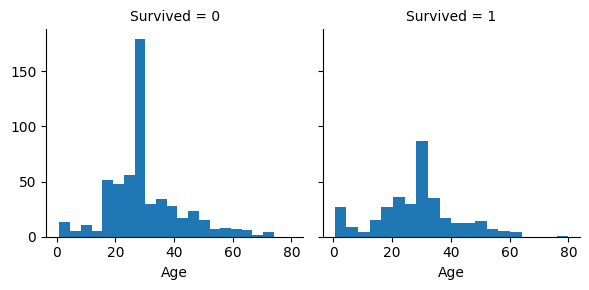

In [241]:
# 年齢
# 欠損値を埋める（平均年齢を算出し欠損値を補完する） 
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
df_train.info()

# 年齢との相関関係を確認(テーブルだと確認しにくい)
df_train.filter(['Age', 'Survived']).groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)

g = sb.FacetGrid(df_train, col='Survived')
g.map(mpl.hist, 'Age', bins=20)


In [238]:
# 年齢の分布を確認
bins = list(range(0,80,5))   
pd.cut(df_train['Age'], bins).value_counts().sort_index()

(0, 5]       44
(5, 10]      20
(10, 15]     19
(15, 20]     96
(20, 25]    122
(25, 30]    285
(30, 35]     88
(35, 40]     67
(40, 45]     47
(45, 50]     39
(50, 55]     24
(55, 60]     18
(60, 65]     14
(65, 70]      3
(70, 75]      4
Name: Age, dtype: int64

seaborn.axisgrid.FacetGrid

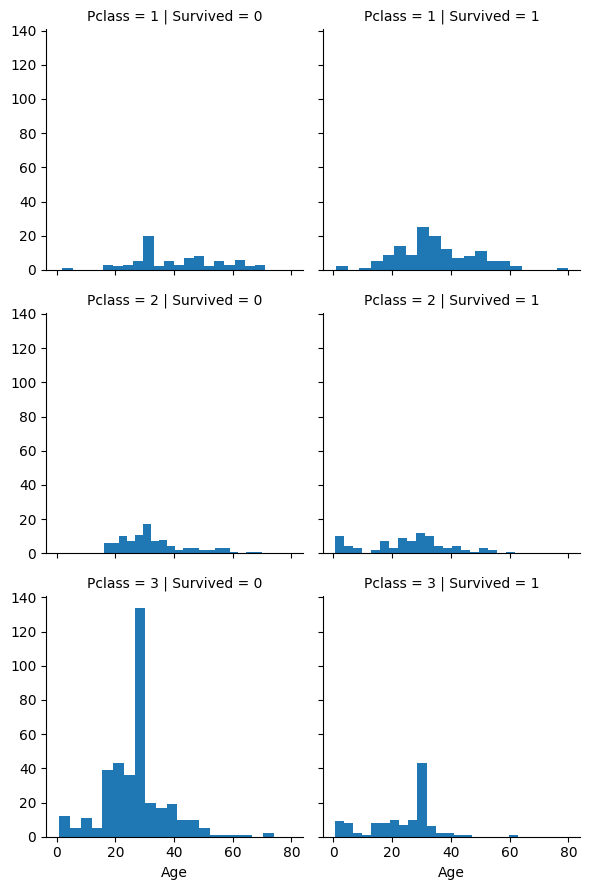

In [248]:
# 客室の等級と死亡率の関係を確認
df_train.filter(['Pclass', 'Survived']).groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=False)

g = sb.FacetGrid(df_train, row='Pclass' , col='Survived')
g.map(mpl.hist, 'Age', bins=20)

決定事項
- 年齢と生存率に相関関係はある。20歳後半の死亡者数が多い。
- 客室の等級３（Pclass = 3） の男性（20歳後半）の死亡者数が多い。

In [250]:
# sibsp: 乗船している兄弟、配偶者の数
df_train.filter(['SibSp', 'Survived']).groupby(['SibSp'], as_index=False).mean().sort_values(by='SibSp', ascending=False)


,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


In [249]:
# parch: 乗船している親、子供の数
df_train.filter(['Parch', 'Survived']).groupby(['Parch'], as_index=False).mean().sort_values(by='Parch', ascending=False)

,Parch,Survived
6,6,0.000000
5,5,0.200000
4,4,0.000000
3,3,0.600000
2,2,0.500000
1,1,0.550847
0,0,0.343658


決定事項
- 兄弟、配偶者が１人の場合、生存確率が高い。おそらく配偶者がいる乗客の生存者が多いと考えられる
- 親、子供の数が１～３人の場合、生存確率が高い。おそらく子供から見た両親、親から見た子供がいる場合に生存確率が高くなる。

よって、家族で乗船した場合に生存確率が高いと考えられる。

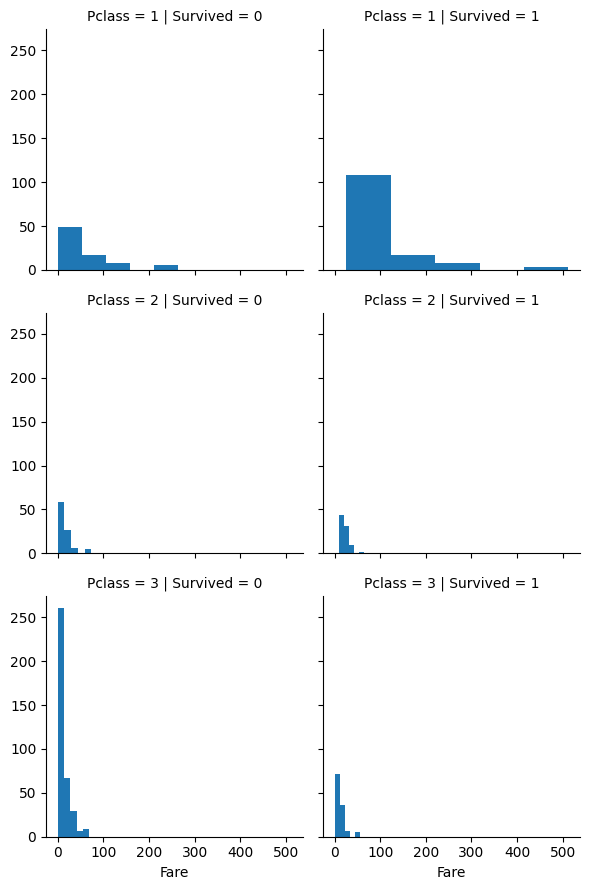

In [254]:
# 運賃との関係を確認
df_train.filter(['Fare', 'Survived']).groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=False)

g = sb.FacetGrid(df_train, col='Survived', row='Pclass')
g.map(mpl.hist, 'Fare', bins=5)

決定事項
- Pclass=1では運賃が高いほうが生存確率が高い。

c:\Users\keita\git\kaggle\kaggle\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\Users\keita\git\kaggle\kaggle\lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


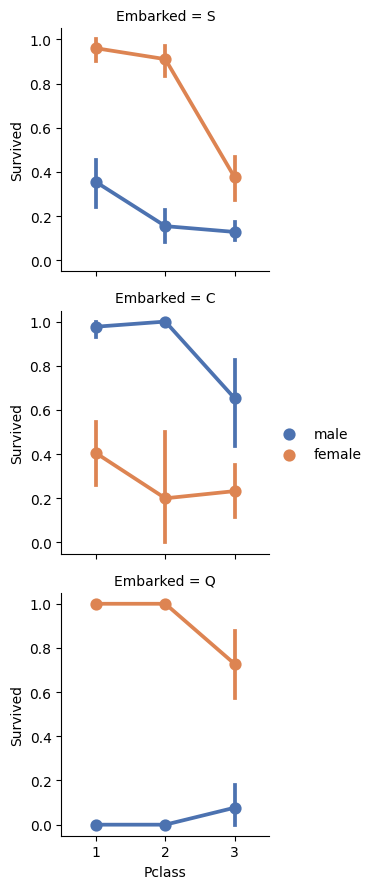

In [270]:
# embarkedとの関係を確認

# ２つの欠損データを補完
df_train['Embarked'].groupby(df_train['Embarked']).count()
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# embarkedとの関係を確認
df_train.filter(['Embarked', 'Survived']).groupby(['Embarked'], as_index=False).mean().sort_values(by='Embarked', ascending=False)

g = sb.FacetGrid(df_train,  row='Embarked')
g.map(sb.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

決定事項
- Cから乗船した男性(male)は生存確率が高い。